# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('avocado.csv',parse_dates=['Date'])
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [3]:
df.shape

(18249, 14)

The given dataset contains 16468 rows & 14 columns.

we see that the given dataset consist of many rows with NaN value,which can be removed

In [4]:
#Removing blank rows
df.dropna(axis=0,inplace=True)

In [5]:
df.shape

(18249, 14)

After removal of all the blank rows ,the dataset contain 1517 rows & 14 columns

In [6]:
#dropping column unnamed,since it represent index
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [7]:
#checking columns name
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
df.rename(columns={'Total Volume':'total_volume','Total Bags':'total_bags','Small Bags':'small_bags','Large Bags':'large_bags','XLarge Bags':'xlarge_bags' },inplace=True)
df.columns

Index(['Date', 'AveragePrice', 'total_volume', '4046', '4225', '4770',
       'total_bags', 'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year',
       'region'],
      dtype='object')

# Segregating Relevant columns in dataset

1.Date-The date of observation 

2.Average Price-The average price of single avogado 

3.Type-Conventional 

4.Region-The city or region of observation 

5.Total Volume-Total no. of avogados sold 

6.4046-Total no. of avogados with PLU(The product lookup Code) 4046 sold 

7.4225-Total no. of avogados with PLU(The product lookup Code) 4225 sold 

8.4770-Total no. of avogados with PLU(The product lookup Code) 4770 sold 

9.Total bags-Total no. of bag sold 

10.Small Bags-Total no. of Small bag sold 

11.Large bags-Total no. of Large bag sold 

12.XLarge bags-Total no. of XLargebag sold


In [9]:
#checking the datatypes of column

df.dtypes

Date            datetime64[ns]
AveragePrice           float64
total_volume           float64
4046                   float64
4225                   float64
4770                   float64
total_bags             float64
small_bags             float64
large_bags             float64
xlarge_bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [10]:
#It will give Index, Datatype and Memory information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   total_volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   total_bags    18249 non-null  float64       
 7   small_bags    18249 non-null  float64       
 8   large_bags    18249 non-null  float64       
 9   xlarge_bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


Observation:- 1. Most columns are of float64 type except Date, Type ,Region 2. Date,Type,Region are of object type


# Checking Missing Values

In [11]:
df.isnull().sum()

Date            0
AveragePrice    0
total_volume    0
4046            0
4225            0
4770            0
total_bags      0
small_bags      0
large_bags      0
xlarge_bags     0
type            0
year            0
region          0
dtype: int64

<AxesSubplot:>

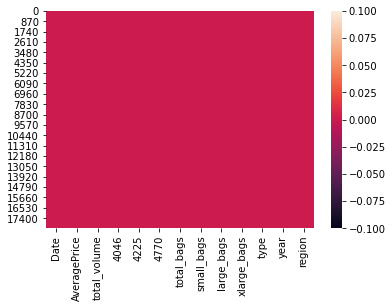

In [12]:
sns.heatmap(df.isnull())

Observation

Now there are no missing values present in the dataset.

# Summary Statistics

In [13]:
#it will give information about all the numerical column
df.describe()

,AveragePrice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Observation:-

1.Many outliers are present ,especially in Xlarge_bag(as large difference b\w 75% & max)

In [14]:
#Splitting date columns into day & month

df['month']=df['Date'].dt.month_name()
df['day']=df['Date'].dt.day_name()

In [15]:
df.drop('Date',axis=1,inplace=True)
df.columns


Index(['AveragePrice', 'total_volume', '4046', '4225', '4770', 'total_bags',
       'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

# Visualisation

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

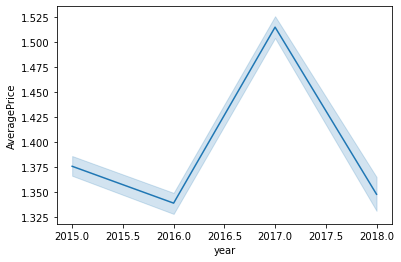

In [16]:
sns.lineplot(x='year',y='AveragePrice',data=df)

we see that avg price rises continuosly

<AxesSubplot:xlabel='small_bags', ylabel='AveragePrice'>

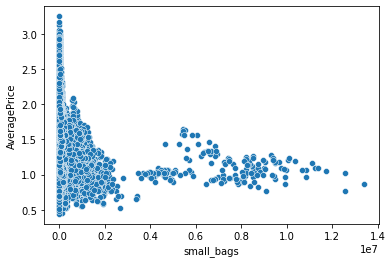

In [17]:
sns.scatterplot(x='small_bags',y='AveragePrice',data=df)

<AxesSubplot:xlabel='4046', ylabel='AveragePrice'>

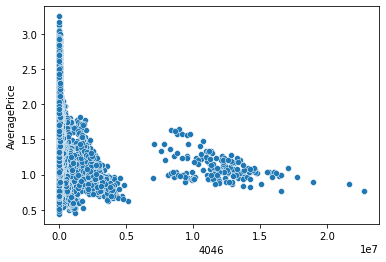

In [18]:
sns.scatterplot(x='4046',y='AveragePrice',data=df)


<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

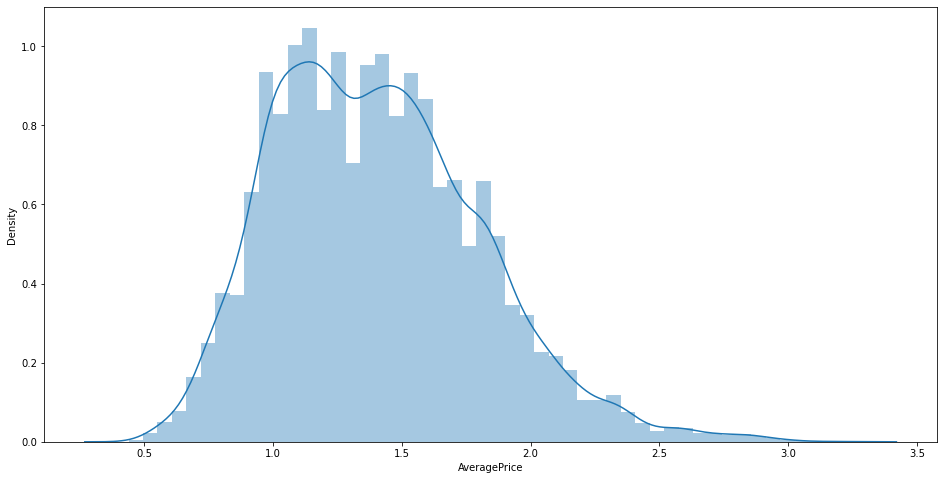

In [19]:
plt.figure(figsize=(16,8))
sns.distplot(a=df.AveragePrice)

Average Price distribution shows that for most cases price of avocado is between 1.0, 1.3

In [20]:
df.columns

Index(['AveragePrice', 'total_volume', '4046', '4225', '4770', 'total_bags',
       'small_bags', 'large_bags', 'xlarge_bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

<AxesSubplot:xlabel='month', ylabel='AveragePrice'>

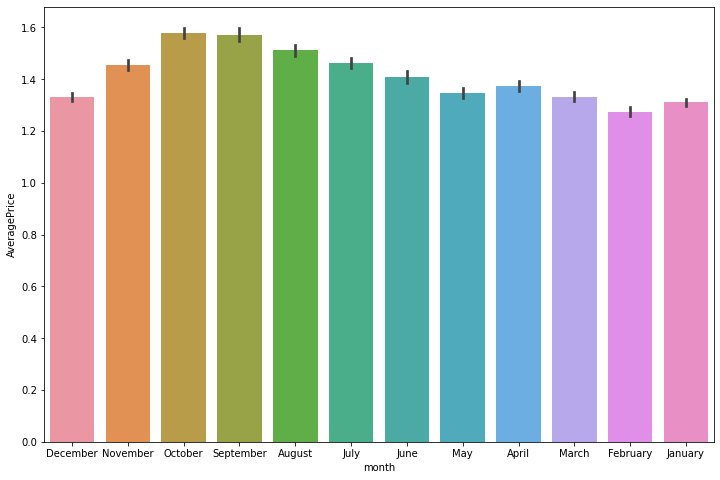

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x='month',y='AveragePrice',data=df)

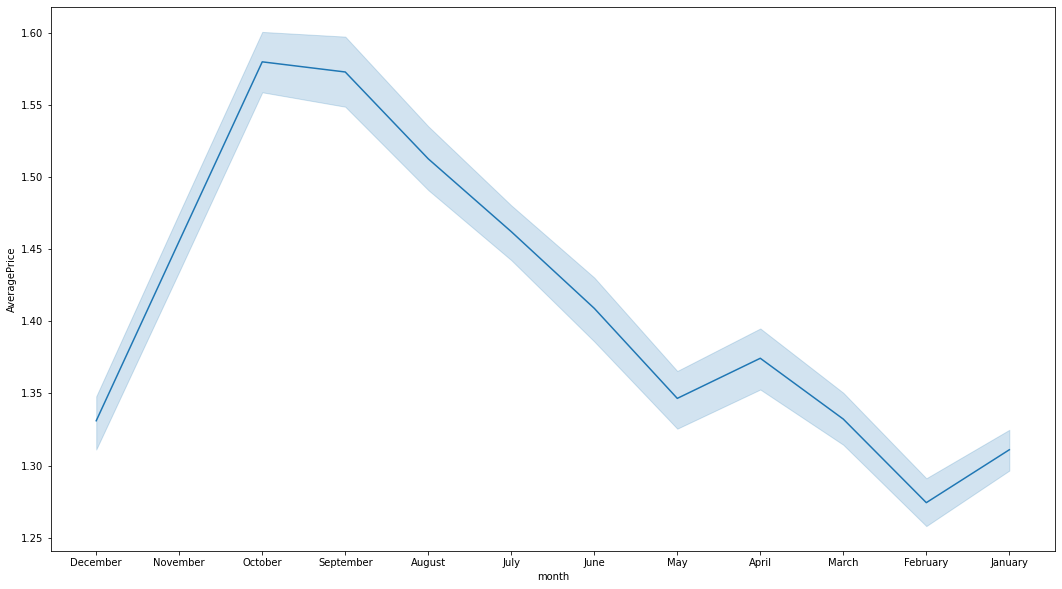

In [22]:
plt.figure(figsize=(18,10))
sns.lineplot(x="month", y="AveragePrice", data=df)
plt.show()

we see that avg price rises in the month of october,november,but overall the prive of avocado is high throughout the year

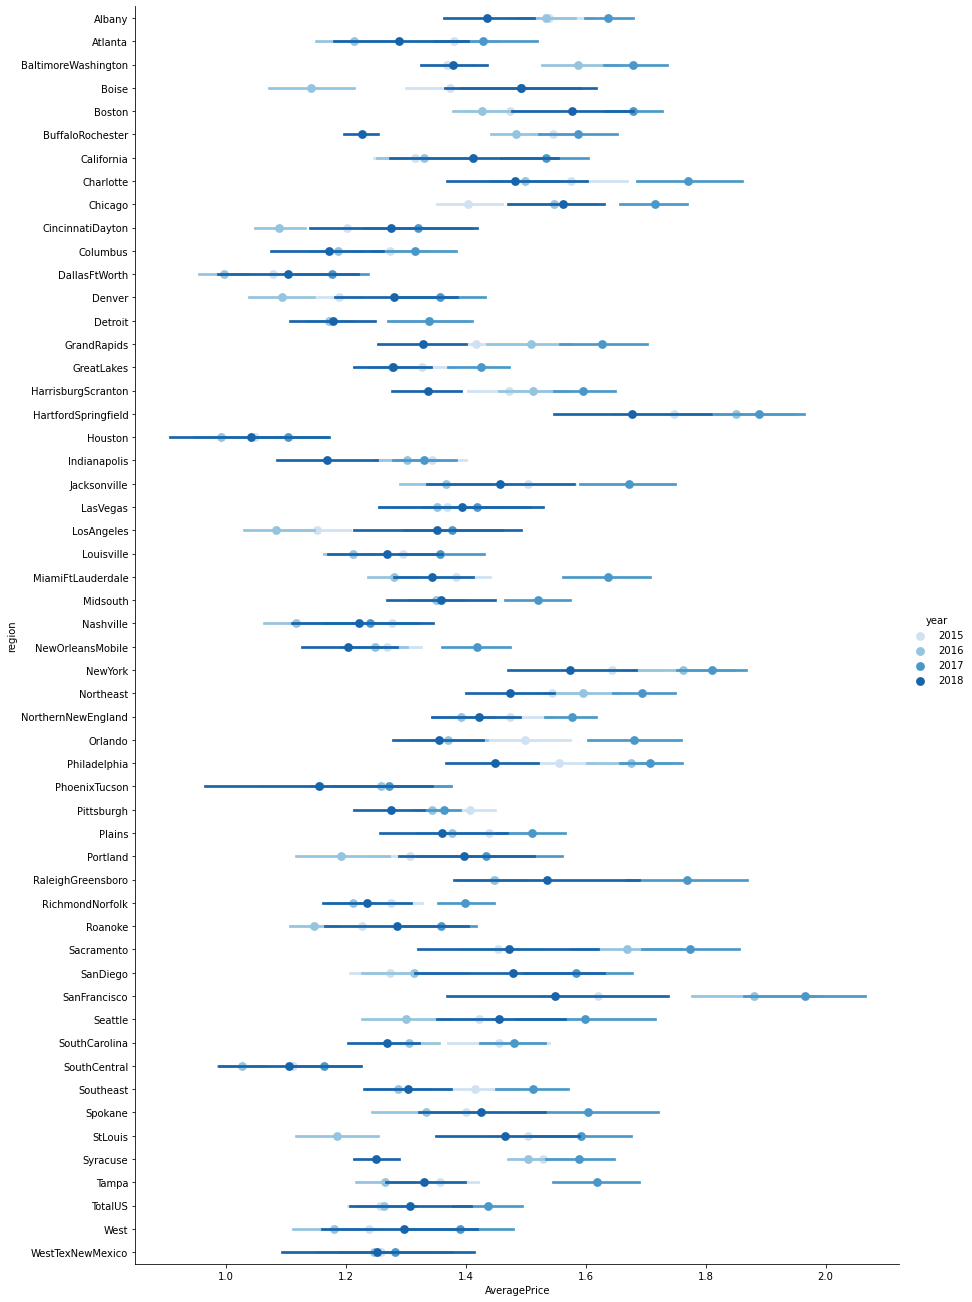

In [23]:
sns.factorplot('AveragePrice','region',data=df,
                   hue='year',
                   size=18,
                   aspect=0.7,
                   palette='Blues',
                   join=False,
              )

Looks like there was a huge increase in Avocado prices in Year 2016 in Boise, South Central & Charlotte region

array([[<AxesSubplot:title={'center':'AveragePrice'}>,
        <AxesSubplot:title={'center':'total_volume'}>,
        <AxesSubplot:title={'center':'4046'}>,
        <AxesSubplot:title={'center':'4225'}>],
       [<AxesSubplot:title={'center':'4770'}>,
        <AxesSubplot:title={'center':'total_bags'}>,
        <AxesSubplot:title={'center':'small_bags'}>,
        <AxesSubplot:title={'center':'large_bags'}>],
       [<AxesSubplot:title={'center':'xlarge_bags'}>,
        <AxesSubplot:title={'center':'year'}>, <AxesSubplot:>,
        <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

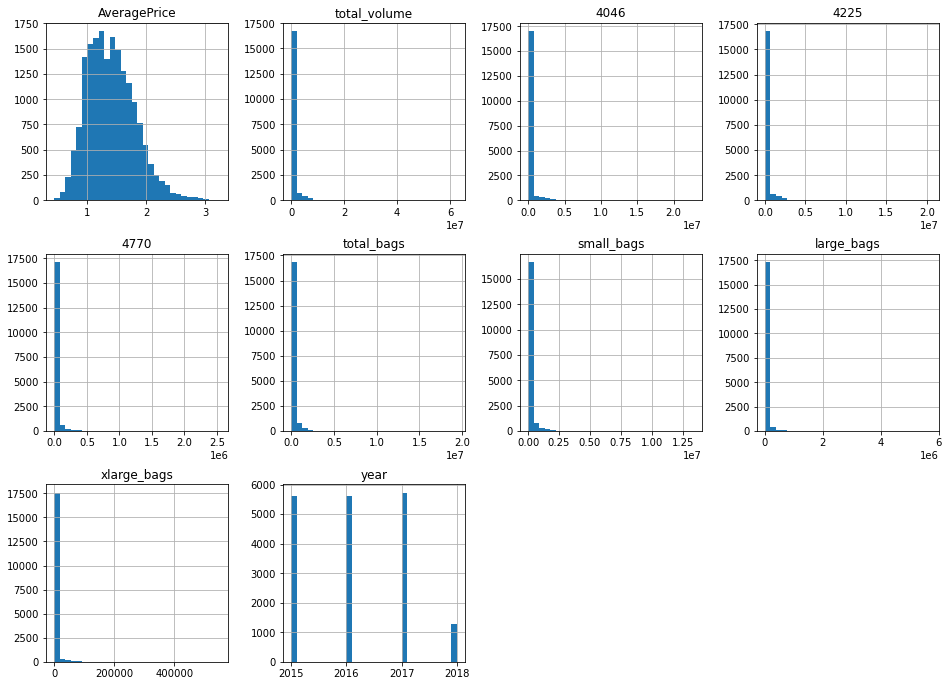

In [24]:
df.hist(figsize=(16,16),grid=True,layout=(4,4),bins=30)

Observation 
1.Avg price column is normally distributed 

2.all other columns seems to be skewed

# Check Correlation


In [25]:
df.corr()

,AveragePrice,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
total_volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
total_bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
small_bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
large_bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
xlarge_bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


Here we see corelation between various column

For better clarity ,we check it via VISUALISATION

<AxesSubplot:>

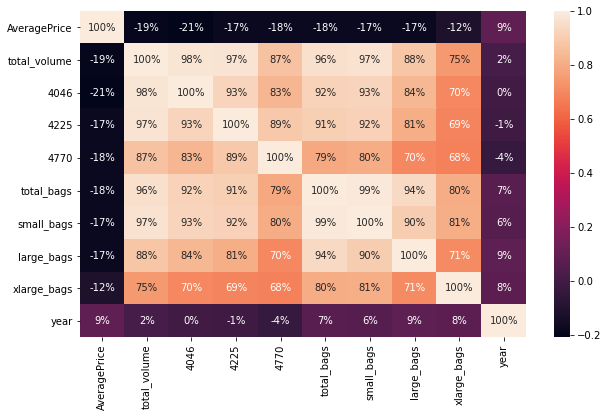

In [26]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,fmt='.0%')

from above heatmap ,we find that all the Features are not much correleted with the Average Price column, instead most of them are correlated with each other.

In [27]:
df['region'].nunique()

54

In [28]:
# we can drop type,as type is conventional for all rows
df.drop(['type','day'],axis=1,inplace=True)
df.shape

(18249, 12)

# Checking Skewness

In [29]:
skew=df.skew()
skew

AveragePrice     0.580303
total_volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
total_bags       9.756072
small_bags       9.540660
large_bags       9.796455
xlarge_bags     13.139751
year             0.215339
dtype: float64


we notice that the data is highly skewed

In [30]:
skew=['AveragePrice', 'total_volume', '4046', '4225', '4770', 'total_bags',
       'small_bags', 'large_bags', 'xlarge_bags']

In [31]:
#remove skewness
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
        
df.skew()

AveragePrice    0.138629
total_volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
total_bags     -0.218874
small_bags     -0.622148
large_bags     -0.547765
xlarge_bags     1.176494
year            0.215339
dtype: float64

In [32]:
df.columns

Index(['AveragePrice', 'total_volume', '4046', '4225', '4770', 'total_bags',
       'small_bags', 'large_bags', 'xlarge_bags', 'year', 'region', 'month'],
      dtype='object')

In [33]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [34]:
list=['month','region']
for val in list:
    df[val]=le.fit_transform(df[val].astype(str))

# Checking Outliers

AveragePrice        AxesSubplot(0.125,0.71587;0.168478x0.16413)
total_volume     AxesSubplot(0.327174,0.71587;0.168478x0.16413)
4046             AxesSubplot(0.529348,0.71587;0.168478x0.16413)
4225             AxesSubplot(0.731522,0.71587;0.168478x0.16413)
4770               AxesSubplot(0.125,0.518913;0.168478x0.16413)
total_bags      AxesSubplot(0.327174,0.518913;0.168478x0.16413)
small_bags      AxesSubplot(0.529348,0.518913;0.168478x0.16413)
large_bags      AxesSubplot(0.731522,0.518913;0.168478x0.16413)
xlarge_bags        AxesSubplot(0.125,0.321957;0.168478x0.16413)
year            AxesSubplot(0.327174,0.321957;0.168478x0.16413)
region          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
month           AxesSubplot(0.731522,0.321957;0.168478x0.16413)
dtype: object

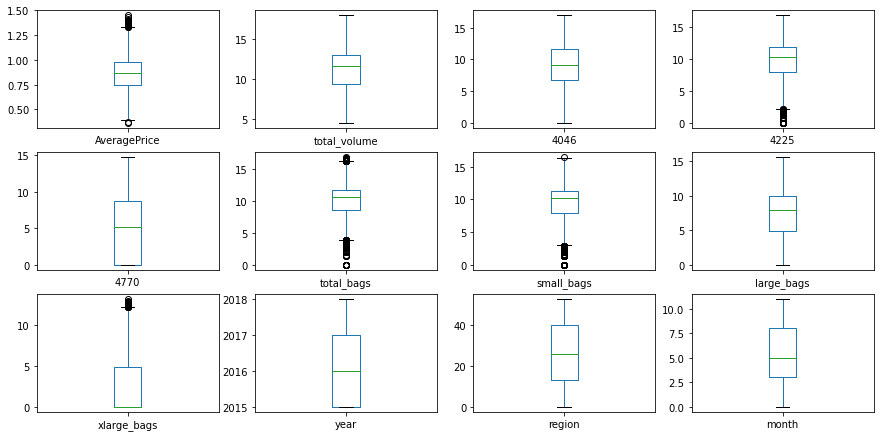

In [35]:
df.plot(kind='box',subplots=True,layout=(4,4),figsize=(15,10))


From above we find that outliers are present in almost all columns

In [36]:
#removing outliers

from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

df_new=df.loc[(z_score<3).all(axis=1)]
print(df_new.shape)

(18249, 12)
(17928, 12)


# Regression Technique for Predicting Average Price as output variable

# Model Training

1st seperating input and output variable

In [37]:
x=df_new.drop(['AveragePrice'],axis=1)
x.shape

(17928, 11)

In [38]:
y=df_new['AveragePrice']
y.shape

(17928,)

In [39]:
#Scaling the input variable
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x=pd.DataFrame(x)

In [40]:
#lets again check skewness
x.skew()

0     0.069796
1    -0.348357
2    -0.405482
3     0.071455
4    -0.111419
5    -0.259482
6    -0.563610
7     1.148988
8     0.201664
9     0.016961
10    0.032657
dtype: float64

In [41]:
#Breaking input and target variable into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

In [42]:
print('x_train_shape:',x_train.shape)
print('x_test_shape:',x_test.shape)
print('y_train_shape:',y_train.shape)
print('y_test_shape:',y_test.shape)

x_train_shape: (14342, 11)
x_test_shape: (3586, 11)
y_train_shape: (14342,)
y_test_shape: (3586,)


In [43]:
#importing our models library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [44]:
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    m.fit(x_train,y_train)
    print('score of ',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('mean absolute error:',mean_absolute_error(y_test,predm))
    print('mean squared error:',mean_squared_error(y_test,predm))
    print('root mean squared error:',np.sqrt(mean_squared_error(y_test,predm)))
    print('r2 score:',r2_score(y_test,predm))
    print('************************************************************************************')
    print('\n')

score of  LinearRegression() is: 0.4877726944051489
Error:
mean absolute error: 0.09452874717144247
mean squared error: 0.013784546468777473
root mean squared error: 0.11740760822356221
r2 score: 0.48388345059263094
************************************************************************************


score of  DecisionTreeRegressor() is: 1.0
Error:
mean absolute error: 0.053202237340166506
mean squared error: 0.006308221319883003
root mean squared error: 0.07942431189429974
r2 score: 0.7638096089783966
************************************************************************************


score of  KNeighborsRegressor() is: 0.8989592543306041
Error:
mean absolute error: 0.0482742917570516
mean squared error: 0.004425334047632068
root mean squared error: 0.06652318428662347
r2 score: 0.8343080678198496
************************************************************************************


score of  SVR() is: 0.7643013287065814
Error:
mean absolute error: 0.06524722534096446
mean squared 

In [45]:
#cross validate the models
from sklearn.model_selection import cross_val_score
model=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),SVR(),Lasso(),Ridge(),ElasticNet()]
for m in model:
    score=cross_val_score(m,x,y,cv=5,scoring='r2')
    print('score of ',m,'is:')
    print('score:',score)
    print('mean score:',score.mean())
    print('standard deviation:',score.std())
    print('******************************************************')
    print('\n')

score of  LinearRegression() is:
score: [-0.49065645  0.14812019  0.26604826  0.10391645  0.07082682]
mean score: 0.01965105638730207
standard deviation: 0.26357134369862684
******************************************************


score of  DecisionTreeRegressor() is:
score: [-1.55630269 -0.17271708 -0.28587947 -0.71405207 -0.52396266]
mean score: -0.6505827928538391
standard deviation: 0.49025579003671765
******************************************************


score of  KNeighborsRegressor() is:
score: [-0.89219675  0.01116493  0.2097908  -0.19907043 -0.18914029]
mean score: -0.21189034556392694
standard deviation: 0.37177072494942387
******************************************************


score of  SVR() is:
score: [-0.0980131   0.40383486  0.2090335   0.21895712 -0.03329732]
mean score: 0.14010301146182086
standard deviation: 0.1829157337328144
******************************************************


score of  Lasso() is:
score: [-2.95100121 -0.65194064 -0.01954746 -0.60103872 -0.

In [ ]:
#Decision TreeRegressor is giving the best result,so finding its best parameter using GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters={'criterion':['mae','friedman_mse','mse'],'random_state':range(30,100)}
dtc=DecisionTreeRegressor()
clf=GridSearchCV(dtc,parameters)
clf.fit(x,y)

print(clf.best_params_)

In [ ]:
#using decision tree model with best paramters

dtc=DecisionTreeRegressor(criterion='friedman_mse',random_state=73)
dtc.fit(x_train, y_train)

dtc_pred = dtc.predict(x_test)
print('score:',dtc.score(x_train,y_train))
print('r2_score',r2_score(y_test,dtc_pred))
print('mean_squared_error',mean_squared_error(y_test,dtc_pred))
print('mean_absolute_error',mean_absolute_error(y_test,dtc_pred))

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score
score=cross_val_score(dtc,x,y,cv=5,scoring='r2')
print('score:',score)
print('mean score:',score.mean())
print('standard deviation:',score.std())

# Ensemble Technique for Score Boosting

In [ ]:
#using Adaboost
from sklearn.ensemble import AdaBoostRegressor

dtc=DecisionTreeRegressor()
ada=AdaBoostRegressor(base_estimator=dtc,n_estimators=20,random_state=73)

ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print('score:',ada.score(x_train,y_train))
print('r2_score',r2_score(y_test,predada))
print('mean_squared_error',mean_squared_error(y_test,predada))
print('mean_absolute_error',mean_absolute_error(y_test,predada))

AdaBoostRegressor is working well because it gives the best r2_score. So we save AdaBoostRegressor as our best model

In [ ]:
#plotting scatter plot between test data & predicted data for adaboost

plt.scatter(y_test,predada)
plt.xlabel('y_test')
plt.ylabel('predicted Y')
plt.title('scatter plot between test data and predicted data')
plt.show()

# Saving the Model

In [ ]:
#saving AdaBoostRegressor

import joblib
joblib.dump(ada,'avocado.pkl')